# Predicting Boston Housing Prices

This project was worked through the Udemy: Data Analysis Course

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model will be trained to predict the prices of the homes in Boston. 

The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.


In [255]:
# IMPORTS

# Staple Inputs
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Dataset
from sklearn.datasets import load_boston


In [256]:
# Loading the Boston dataset
data_boston = load_boston()

In [257]:
print(data_boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [258]:
boston_df = DataFrame(data_boston.data)
boston_df.columns = data_boston.feature_names

# Complete df
boston_df['PRICE'] = data_boston.target

# Separating the df into their respective df
X_fts = boston_df.drop('PRICE',axis=1)
y_price =  boston_df['PRICE']

In [259]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---

## Data Exploration

In [260]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [261]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [262]:
# Using the apply to function to get the total amount of unique observations
boston_df.apply(lambda x: len(x.unique()))

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

- ** Contains a lot of continous variables**

In [263]:
# Using the apply function, for every column, we find the total amount of NULL/NA values
boston_df.apply(lambda x: sum(x.isnull()))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

- **That's a great thing, there is no NaN values**

In [264]:
## Indepth look at price

min_price = np.min(y_price)
max_price = np.max(y_price)
mean_price = np.mean(y_price)
median_price = np.median(y_price)
std_price = np.std(y_price)

print("Descriptive Statistics\n")
print("The maximum price for the PRICE is {0:.2f}".format(max_price*1000))
print("The minimum price for the PRICE is {0:.2f}".format(min_price*1000))
print("The mean price for the PRICE is {0:.2f}".format(mean_price*1000))
print("The median price for the PRICE is {0:.2f}".format(median_price*1000))
print("The std fo the price for the PRICE is {0:.2f}".format(std_price*1000))


Descriptive Statistics

The maximum price for the PRICE is 50000.00
The minimum price for the PRICE is 5000.00
The mean price for the PRICE is 22532.81
The median price for the PRICE is 21200.00
The std fo the price for the PRICE is 9188.01


---

## Data Visualization

In [265]:
all_cols = boston_df.columns

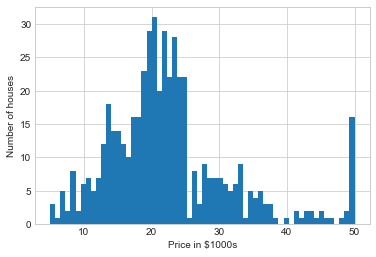

In [266]:
# Histogram of prices (this is the target of our dataset)
plt.hist(y_price,bins=60)

plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')
plt.show()

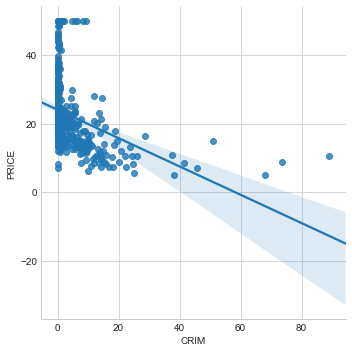

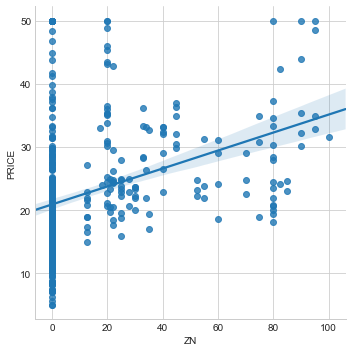

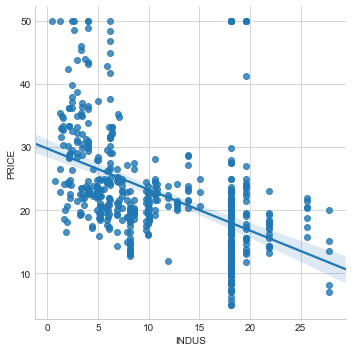

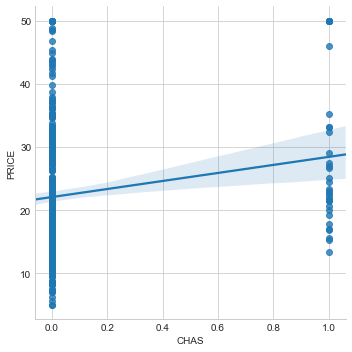

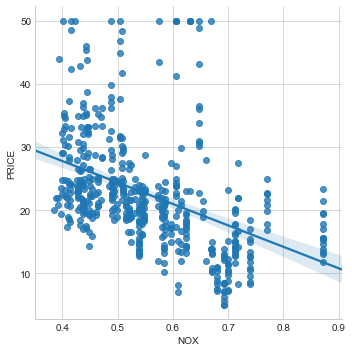

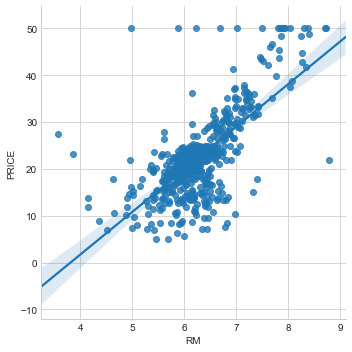

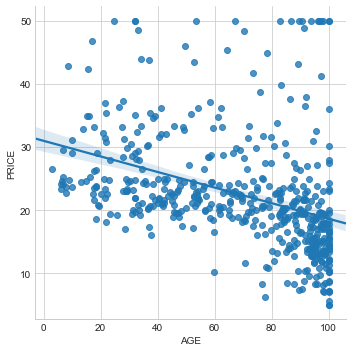

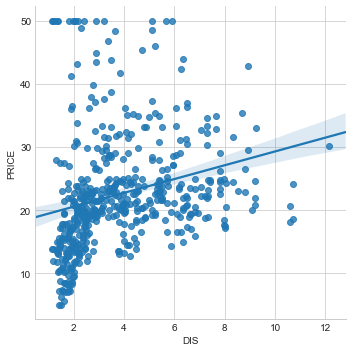

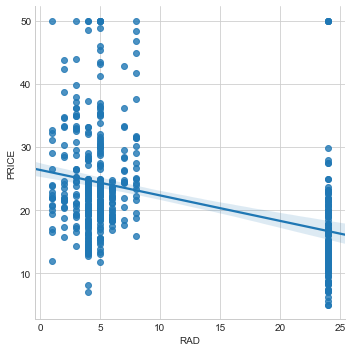

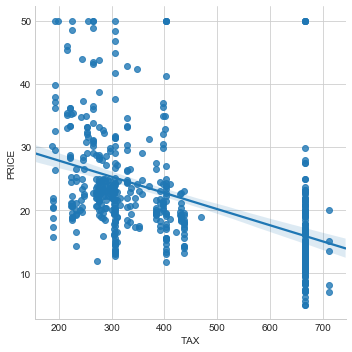

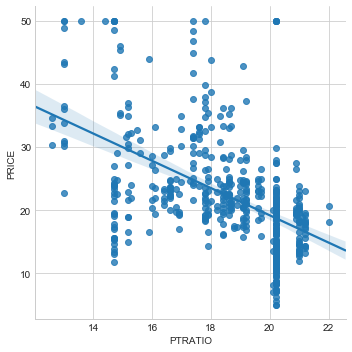

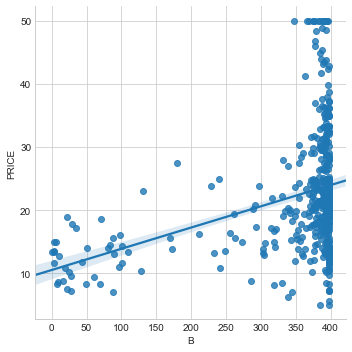

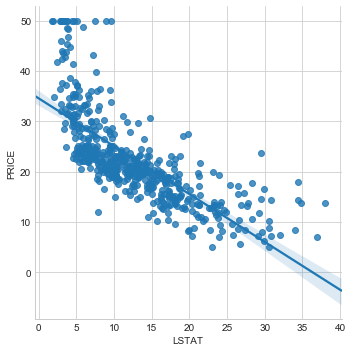

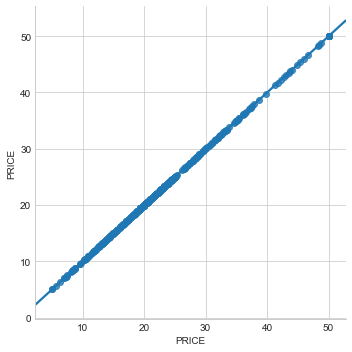

In [267]:
# creating a visual of the correlation of all the dependent variables
for i, cols in enumerate(all_cols):    
    sns.lmplot(cols, "PRICE",data = boston_df)
    plt.show()



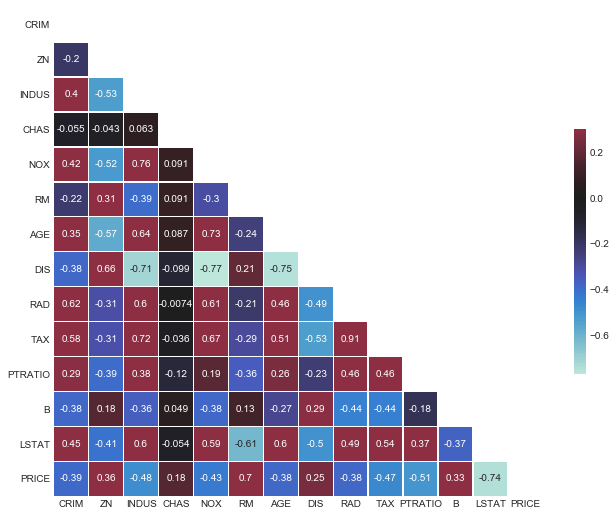

In [268]:
# Compute the correlation matrix
corr = boston_df.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [269]:
corr_matrix = boston_df.corr()
corr_matrix['PRICE'].sort_values(ascending=False)

PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

---

## Feature Selection

In [270]:
import statsmodels.api as sm
from scipy import stats
from collections import defaultdict

global dict_adjus_R
dict_adjus_R = defaultdict(list)


In [271]:
def HighestPvalue(model, threshold):
    highest_pvalue = 0
    
    for index, current_pvalue in model.pvalues.items():
        if current_pvalue > highest_pvalue:
            highest_pvalue = current_pvalue
            highest_index = index
            
    if highest_pvalue > threshold: return highest_index
    else: return True

In [272]:
def CreateLinearReg(x, y):
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    return est2

In [273]:
def BackwardElimination(Xs, y, stats_signf):
    model_info = CreateLinearReg(Xs, y)
    p_results = HighestPvalue(model_info, stats_signf)

    dict_adjus_R[len(Xs.columns)].append([Xs.columns, model_info.rsquared_adj])
    
    if p_results is True: return model_info

    else:
        Xs.drop(p_results, axis=1, inplace=True)
        BackwardElimination(Xs, y, stats_signf)


In [276]:
# Statistical sigficance we would like to uses
stats_signf = 0.05
final_model = BackwardElimination(X_fts, y_price, stats_signf)
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          5.74e-137
Time:                        13:58:52   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3694      5.069      7.176      0.000      26.411      46.328
CRIM          -0.1076      0.033     -3.296      0.001      -0.172      -0.043
ZN             0.0458      0.014      3.387      0.001       0.019       0.072
CHAS           2.7212      0.854      3.185      0.002       1.043       4.400
NOX          -17.3956      3.536     -4.920      0.000     -24.343     -10.448
RM             3.7966      0.406      9.343      0.000       2.998       4.595
DIS           -1.4934      0.186     -8.039      0.000      -1.858      -1.128
RAD            0.2991      0.063      4.719      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.488      0.001      -0.018      -0.005
PTRATIO       -0.9471      0.129     -7.337      0.000      -1.201      -0.693
B              0.0094      0.003      3.508      0.000       0.004       0.015
LSTAT         -0.5232      0.047    -11.037      0.000      -0.616      -0.430
==============================================================================
Omnibus:                      178.444   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.944
Skew:                           1.524   Prob(JB):                    1.31e-171
Kurtosis:                       8.295   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [277]:
# Dictionary with some of their best models. 
# This was done to look at a group of variable and there adjusted R_Squared
dict_adjus_R

defaultdict(list,
            {11: [[Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                      'LSTAT'],
                     dtype='object'),
               0.73476802182854828],
              [Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                      'LSTAT'],
                     dtype='object'), 0.73476802182854828],
              [Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                      'LSTAT'],
                     dtype='object'), 0.73476802182854828]],
             12: [[Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
                      'PTRATIO', 'B', 'LSTAT'],
                     dtype='object'), 0.73429218983604261]],
             13: [[Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                      'PTRATIO', 'B', 'LSTAT'],
                     dtype='object'), 0.7337538824121872]]

In [278]:
# Based on the analysis using backward elimination, I will look into using these variables
X_fts_1 = X_fts[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 
                        'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']]

In [279]:
X_fts_1.head()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


___

## Data Modeling

### Comparison
Similarities: Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.

Differences: Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. 

### Implementation: Define a Performance Metric
We will calculate the coefficient of determination, ${R}^2$, to quantify our model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for ${R}^2$ range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. 

- ${R}^2$ of 0 is no better than a model that always predicts the mean of the target variable
- ${R}^2$ of 1 perfectly predicts the target variable
- Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.

In [280]:
from sklearn.metrics import r2_score

def Score_R2(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

### Training/Testing the Dataset

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.

In [281]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [282]:
from sklearn.model_selection import train_test_split

# Splitting the dataset to understand how the model perform on a simple split
X_train, X_test, y_train, y_test = train_test_split(X_fts_1, y_price, test_size=0.2)
model = linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)


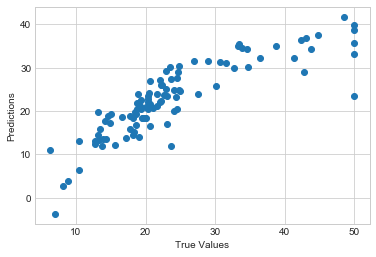

In [283]:
# Visualizing the performance of the dataset

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [284]:
model_score = model.score(X_test, y_test)
print ("Model R_Square Performance:, {0:.2f}".format(model_score))


Model R_Square Performance:, 0.72


### Cross Validation

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.

In [288]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

seed = 7
splits = 10
kfold = KFold(n_splits=splits, random_state=seed)


In [290]:
scoring = 'neg_mean_squared_error'
results = cross_val_score(linreg, X_fts_1, y_price, cv=kfold, scoring=scoring)

all_RMSE = [np.sqrt(np.abs(result)) for result in results]
RMSE = np.sqrt(np.abs(results.mean()))
RMSE_std = np.sqrt(results.std())

print("For the RMSE, the mean is {0:.3f} and the std. deviation is {1:.3f}\n".format(RMSE, RMSE_std))
print("The RMSE for all the CV are {0}".format('\n'.join(str(r) for r in all_RMSE)))


For the RMSE, the mean is 5.723 and the std. deviation is 6.451

The RMSE for all the CV are 3.0325086999
3.7300523343
3.49240202316
5.93185975761
5.45459716069
4.40422039266
3.14890618193
12.4212881393
5.77112150767
3.22201336351


In [291]:
scoring = 'r2'

results = cross_val_score(linreg, X_fts_1, y_price, cv=kfold, scoring=scoring)
print("For the R Squared, the mean is {0:.3f} and the std. deviation is {1:.3f}\n".format(results.mean(), results.std()))
print("The R Squared for all the CV are \n{0}".format('\n'.join(str(r) for r in results)))


For the R Squared, the mean is 0.247 and the std. deviation is 0.543

The R Squared for all the CV are 
0.736364963982
0.481934238314
-0.738769807462
0.641343334412
0.577913070194
0.742233036329
0.380262591077
-0.0347512291036
-0.767164243387
0.449640823275


#### Decision Tree Regressors

In [292]:
import visuals as vs

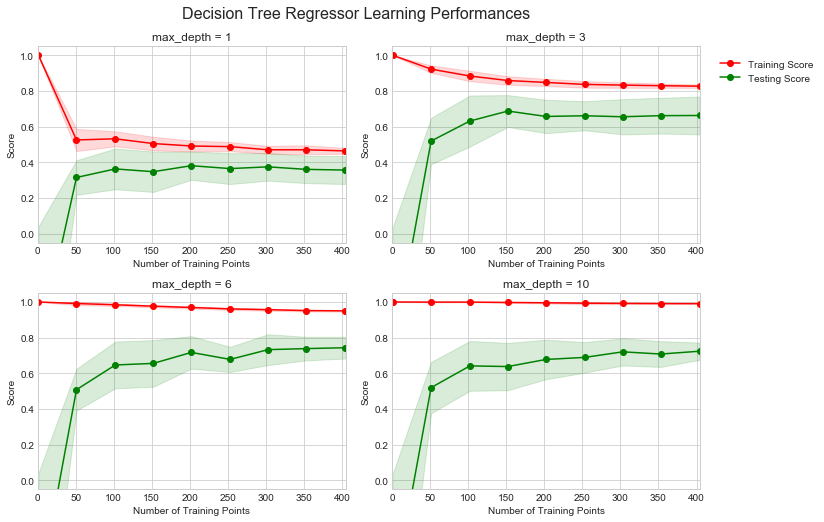

In [293]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(X_fts_1, y_price)

** RESULTS**

**Depth of 1:**
- This is a high bias sceanario because the score is pretty low. Hence, the model is underfitting.
- The testing score (green line) increases with the number of observations.
- The testing score only increases to approximately 0.4, a low score.
- The training score decreases to a very low score of approximately 0.4.
- This indicates how the model does not seem to fit the data well.
- **Consequently, having more training points would not benefit the model as the model is underfitting the dataset. Instead, one should increase the model complexity to better fit the dataset.**


**Depth of 3:**
- Ideal sceanrio.
- The testing score increased, but has hit a plateau at a good score (~0.7)
- The model does a good job in generalizing the data
- The training score decreases to a very low score of approximately (~0.8)
- There seems to be no high bias or high variance problem.
- **Having more training points might benefit the model as the model.**


**Depth of 6:**
- Slight high variance problem
- The training score seems to be a bit good, thus indicating a high variance problem where the model is picking up a lot of the noise
- It is overfitting
- The testing score increased, but has hit a plateau at a good score (~0.8)
- The training score decreases to a very low score of approximately (~1.0)
- **Having more training points might benefit the model as the model.**


**Depth of 10:**
- High variance problem
- The training score seems to be overfitting, thus indicating a high variance problem where the model is picking up a lot of the noise
- It is overfitting
- The testing score increased, but has hit a plateau at a good score (~0.8)
- The training score decreases to a very low score of approximately (~0.9)
- **Try smaller sets of features (bc you are overfitting).**



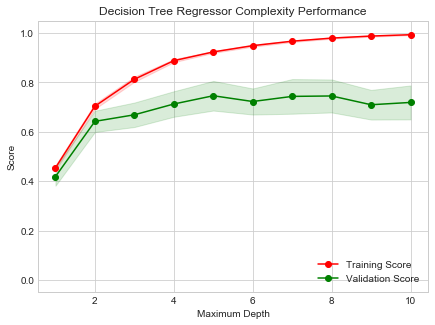

In [294]:
vs.ModelComplexity(X_train, y_train)

**RESULTS**

The ideal depth should be 3 or 4. Of course, if its 4, it would require more computational power but it can indicaite a better model. A maximum depth of 3 also looks great to use!

### Grid Search

Grid searches specific  parameters, and the possible values of those parameters. The grid search then returns the best parameter values for our model, after fitting the supplied data. This takes out the guess-work involved in seeking out the opitimal paramter values for a classifier.

Although we will be using GridSearchCV, it may be computationally expensive for a bigger dataset.
There are other techniques that could be used for hyperparameter optimization in order to save time like RandomizedSearchCV, in this case instead of exploring the whole parameter space just a fixed number of parameter settings is sampled from the specified distributions.


In [295]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Using the variables from the grid search
def GridSearch_DecReg(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid

In [303]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


def VisualizeDecisionTree(parameters, x, y):
    
    params = parameters.best_estimator_.get_params()

        
    dt_model = DecisionTreeRegressor(**params)
    dt_fit = dt_model.fit(x, y)
    ####
    
    dot_data = StringIO()
    export_graphviz(dt_fit, out_file=dot_data, special_characters=True, 
                     filled=True, rounded=True, feature_names=x.columns)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())
 

In [359]:
grid_p = GridSearch_DecReg(X_fts_1, y_price)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {0} for the optimal model.".format(grid_p.best_estimator_.get_params()['max_depth']))


Parameter 'max_depth' is 5 for the optimal model.


In [298]:
# Checking the scores
# print(grid_p.cv_results_)

In [299]:
#Creating the decision tree for the specific 
X_train, X_test, y_train, y_test = train_test_split(X_fts_1, y_price, test_size=0.2)

params = grid_p.best_estimator_.get_params()

dt_model = DecisionTreeRegressor(**params)
dt_fit = dt_model.fit(X_train, y_train)

dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 10)

r2_sqr_ytest = r2_score(y_test, grid_p.best_estimator_.predict(X_test))
score_ytest = dt_fit.score(X_test, y_test)

print("""R Squared using the predicted model using the gridCV parameters
      for the y test is {0:.2f}""".format(r2_sqr_ytest))

print("The score fitting for the testing set is {0:.2f}".format(score_ytest))
print("Mean cross validation score: {0:.2f}".format(np.mean(dt_scores)))

R Squared using the predicted model using the gridCV parameters
      for the y test is 0.96
The score fitting for the testing set is 0.74
Mean cross validation score: 0.64


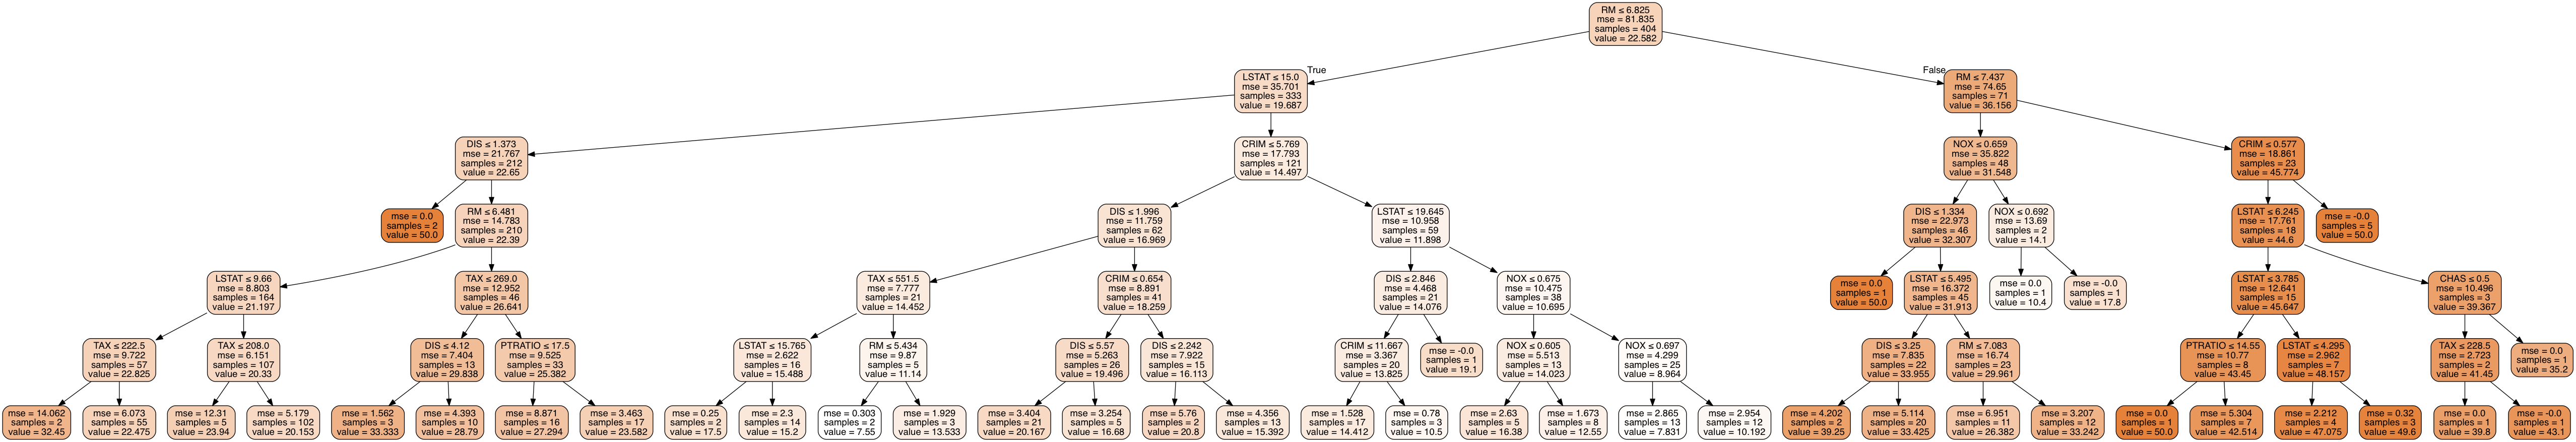

In [305]:
VisualizeDecisionTree(grid_p, X_train, y_train)

** Quite intersting. Variables used were LSTAT, RM, DIS, CRIM, DIS, NOX, PTRATIO, TAX**

In [311]:
# New set of variables
X_fts_2 = X_fts_1[['LSTAT','RM','DIS','CRIM','DIS']]

In [312]:
grid_p_2 = GridSearch_DecReg(X_fts_2, y_price)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {0} for the optimal model.".format(grid_p_2.best_estimator_.get_params()['max_depth']))


Parameter 'max_depth' is 5 for the optimal model.


In [313]:
#Creating the decision tree for the specific 
X_train, X_test, y_train, y_test = train_test_split(X_fts_2, y_price, test_size=0.2)

params = grid_p_2.best_estimator_.get_params()

dt_model = DecisionTreeRegressor(**params)
dt_fit = dt_model.fit(X_train, y_train)

dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 10)

r2_sqr_ytest = r2_score(y_test, grid_p_2.best_estimator_.predict(X_test))
score_ytest = dt_fit.score(X_test, y_test)

print("""R Squared using the predicted model using the gridCV parameters
      for the y test is {0:.2f}""".format(r2_sqr_ytest))

print("The score fitting for the testing set is {0:.2f}".format(score_ytest))
print("Mean cross validation score: {0:.2f}".format(np.mean(dt_scores)))

R Squared using the predicted model using the gridCV parameters
      for the y test is 0.90
The score fitting for the testing set is 0.86
Mean cross validation score: 0.65


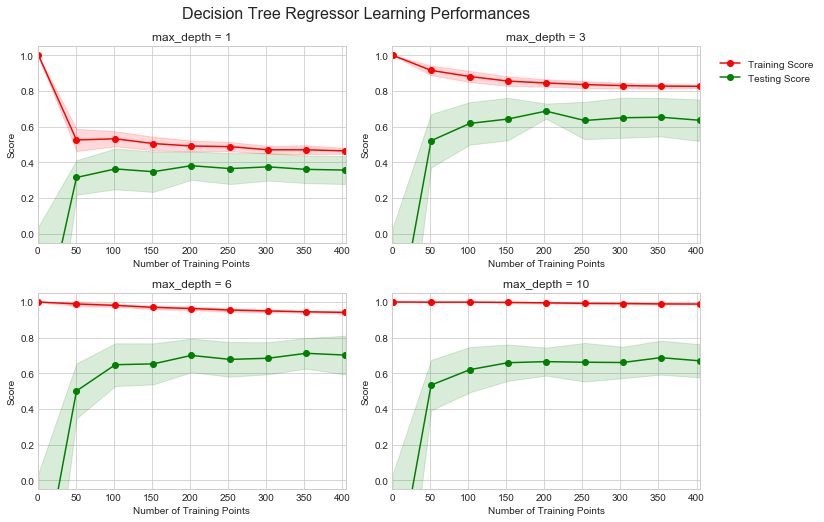

In [309]:
# Will redo the process with the top 5 variables!
vs.ModelLearning(X_fts_2, y_price)

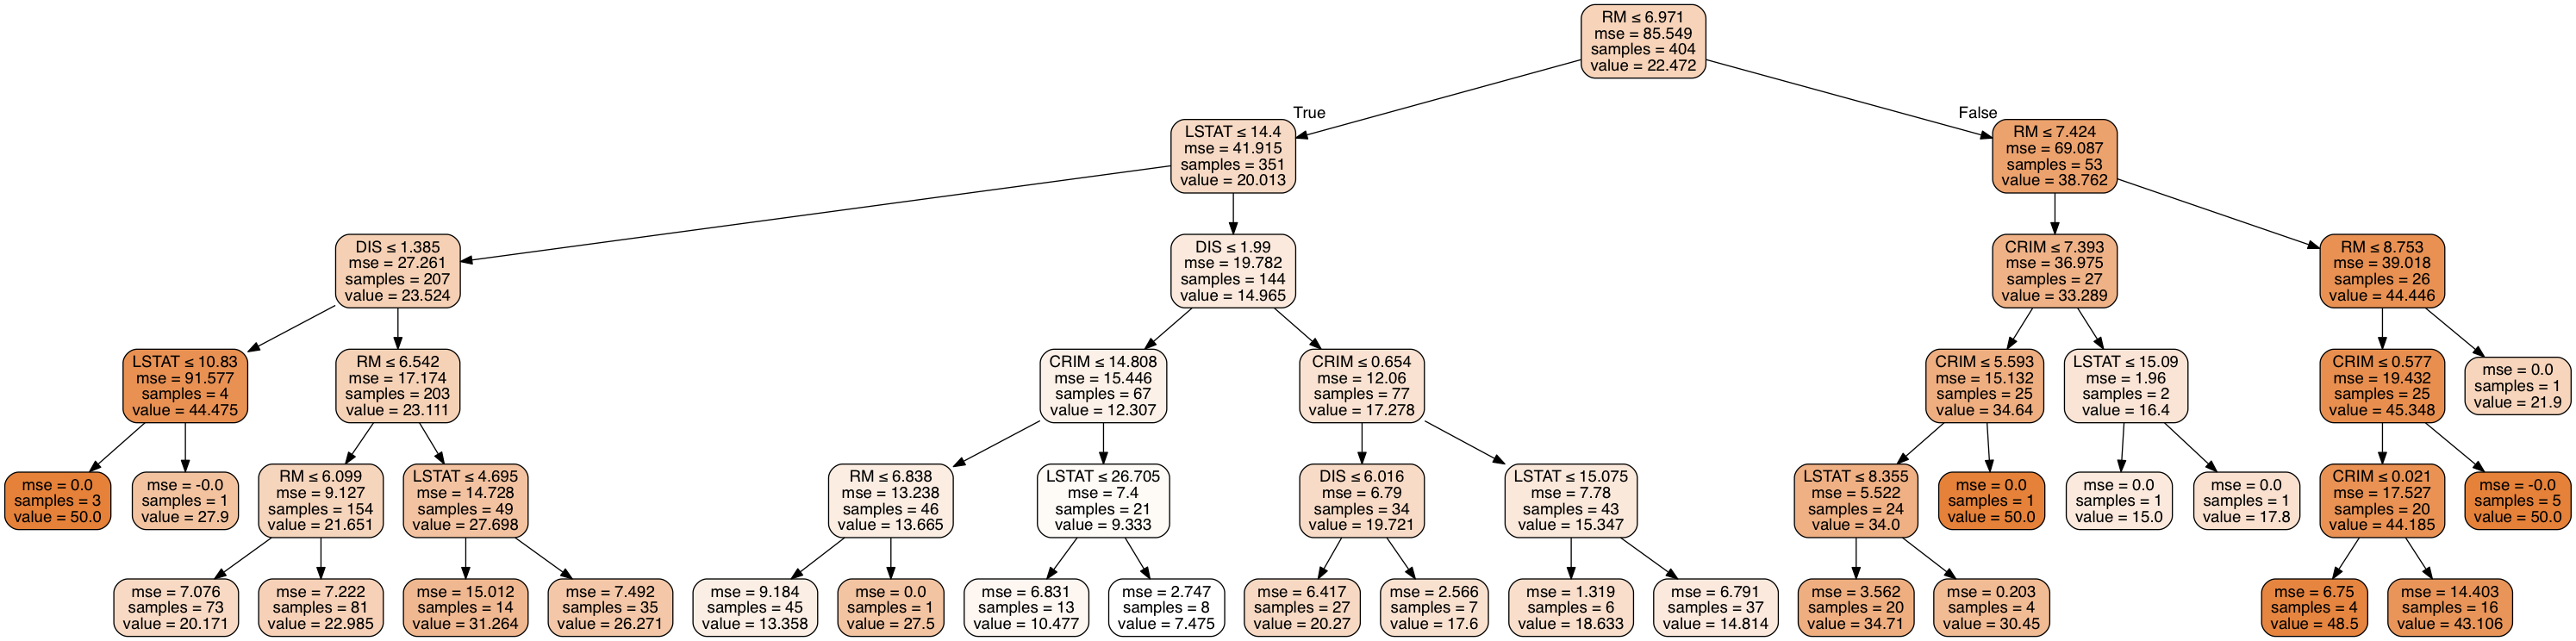

In [310]:
VisualizeDecisionTree(grid_p, X_train, y_train)

### Will use the first model for predictions

In [ ]:
from collections import defaultdict

# Let perform for all of them with differernt ranges
ranges = [0.025, 0.05, 0.1]
var_d = defaultdict(list)


In [361]:
from collections import defaultdict

client_data = {}

for val in boston_df.columns:
    min_val = np.min(boston_df[val])
    max_val = np.max(boston_df[val])
    sampl = np.random.uniform(low=min_val, high=max_val, size=(10,))
    client_data["{0}".format(val)] = sampl


In [382]:
from pandas import DataFrame
client_df = DataFrame.from_dict(client_data)
client_df = client_df[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 
           'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']]

In [389]:
for i, price in enumerate(grid_p.best_estimator_.predict(client_df)):
    print ("Predicted selling price for Client {0}'s home: ${1:,.2f}".format(i+1, price*1000))

Predicted selling price for Client 1's home: $20,967.76
Predicted selling price for Client 2's home: $14,410.00
Predicted selling price for Client 3's home: $21,900.00
Predicted selling price for Client 4's home: $9,810.87
Predicted selling price for Client 5's home: $14,410.00
Predicted selling price for Client 6's home: $9,810.87
Predicted selling price for Client 7's home: $15,539.29
Predicted selling price for Client 8's home: $26,168.42
Predicted selling price for Client 9's home: $15,539.29
Predicted selling price for Client 10's home: $15,539.29


### Results
- Min Price: $5,000.00

- Max Price: $50,000.00

- Std Deviation: $9188.01

- Median Price: $21,200.00

- Mean Price: $22532.81


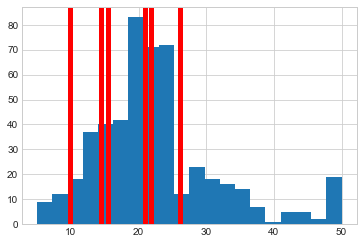

In [397]:
import matplotlib.pyplot as plt
plt.hist(y_price, bins = 20)
for price in grid_p.best_estimator_.predict(client_df):
    plt.axvline(price, lw = 5, c = 'r')

** MOST of the data does fit within the distribution**

In [402]:

# Using the variables from the grid search
def Temp_GridSearch(X, y):
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor()
    params = {'max_depth': range(1,11)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_

vs.PredictTrials(X_fts_1, y_price, Temp_GridSearch, client_df.as_matrix())


Trial 1: $20.34
Trial 2: $20.50
Trial 3: $10.90
Trial 4: $19.93
Trial 5: $20.34
Trial 6: $20.67
Trial 7: $21.05
Trial 8: $20.58
Trial 9: $20.89
Trial 10: $21.77

Range in prices: $10.87
